# Origin-Destination Survey zones and  that are destinations from urban neighborhoods

Selection of OD zones that are urban and main destinations of trips from urban areas.
Data: Encuesta Origen y Destino 2017, Área Metropolitana del Valle de Aburrá (EOD_2017_sintesis.xlsx).
Data source: Juan Pablo Ospina, PhD(c) RiSE Group.

Goal: to select the SIT zones that are the destination from Medellin's urban SIT zones, weighted by the number of persons that made the trips (not by the number of trips because one person usually records more than one trip in the OD Survey).

In [1]:
# Load libraries
import pandas as pd
from pandas import ExcelWriter 
from pandas import ExcelFile # for reading excel files
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy 

## Load data

In [2]:
# Load excel file (EOD_2017_DatosViajes.xlsx) as dataframe
OD_trips_path = '../EOD_2017/EOD_2017_sintesis.xlsx'

# The excel file contains several sheets, we need trip data stored in sheet '4.Matriz_OD_Work+Study'
# The data was pre-processed by Juan P. Ospina with inflation factors
# The data has only trips to study or to work
OD_trips_df = pd.read_excel(OD_trips_path, sheet_name='4.Matriz_OD_Work+Study')
OD_trips_df.head()

,SIT_EOD2017,1,2,3,4,5,6,7,8,9,...,802,803,804,805,806,807,810,811,812,Grand Total
0,1,364.023018,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,72.804604,72.804604,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1892.919693
1,2,0.000000,145.609207,0.000000,0.000000,0.000000,0.0,0.000000,364.023018,291.218414,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,3785.839386
2,3,72.804604,0.000000,873.655243,218.413811,0.000000,0.0,0.000000,291.218414,218.413811,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,5751.563683
3,4,0.000000,0.000000,0.000000,0.000000,281.041893,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,749.445047
4,5,0.000000,0.000000,0.000000,0.000000,1405.209463,0.0,93.680631,93.680631,0.000000,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,4496.670281


In [3]:
OD_trips_df.tail()

,SIT_EOD2017,1,2,3,4,5,6,7,8,9,...,802,803,804,805,806,807,810,811,812,Grand Total
540,806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
541,807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
542,811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
543,812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
544,Grand Total,2529.153925,257.307444,1480.481641,303.327903,2279.282158,1193.944658,3589.221461,2688.296799,2387.829797,...,492.833384,525.098839,0,197.702212,165.601178,188.146178,133.743388,75.994085,236.876534,1.893625e+06


<class 'numpy.ndarray'>
(544, 544)
float64


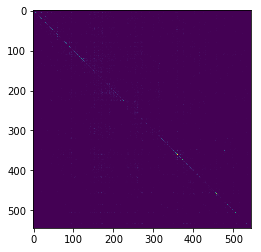

In [4]:
# visualize as matrix

matrix = OD_trips_df.values
matrix = matrix[:-1, 1:-1]
matrix = matrix.astype(float)
print(type(matrix))
print(matrix.shape)
print(matrix.dtype)
plt.imshow(matrix)

In [5]:
# Columns in 'DATOS VIAJES'
OD_trips_df.columns

Index(['SIT_EOD2017',             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 802,           803,           804,           805,
                 806,           807,           810,           811,
                 812, 'Grand Total'],
      dtype='object', length=546)

In [6]:
# number of SIT_EOD2017 unique values
len(OD_trips_df['SIT_EOD2017'].unique())

544

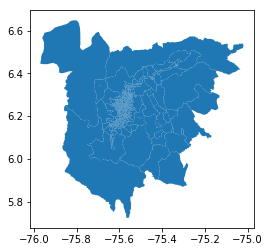

In [7]:
# Load geographies

# SIT zones
SIT_zones_path = '../EOD_2017/fwdzonassit20172018/EOD2018_Zonas_SIT.shp'
SIT_zones = gpd.read_file(SIT_zones_path)
SIT_zones.plot()

In [8]:
SIT_zones.head()

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,desc2,area_ha,geometry
0,1,None,None,None,None,None,-1,0,-1,None,None,Medellin urbano,26.452,POLYGON Z ((-75.54068356773411 6.3024448096601...
1,10,None,None,None,None,None,-1,0,-1,None,None,Medellin urbano,6.738,POLYGON Z ((-75.5414934364377 6.29277081622273...
2,100,None,None,None,None,None,-1,0,-1,None,None,Medellin urbano,41.420,POLYGON Z ((-75.5719869666916 6.31100734501016...
3,101,None,None,None,None,None,-1,0,-1,None,None,Medellin urbano,39.840,POLYGON Z ((-75.5745398852947 6.30381632076182...
4,102,None,None,None,None,None,-1,0,-1,None,None,Medellin urbano,28.680,POLYGON Z ((-75.5805618474142 6.29757524471215...


In [9]:
# drop empty fields or filled with "None"

columns = ['descriptio', 'timestamp', 'begin', 'end', 'altitudeMo', 'tessellate',
          'extrude', 'visibility', 'drawOrder', 'icon']
SIT_zones.drop(columns, inplace=True, axis=1)
SIT_zones.head()

,Name,desc2,area_ha,geometry
0,1,Medellin urbano,26.452,POLYGON Z ((-75.54068356773411 6.3024448096601...
1,10,Medellin urbano,6.738,POLYGON Z ((-75.5414934364377 6.29277081622273...
2,100,Medellin urbano,41.420,POLYGON Z ((-75.5719869666916 6.31100734501016...
3,101,Medellin urbano,39.840,POLYGON Z ((-75.5745398852947 6.30381632076182...
4,102,Medellin urbano,28.680,POLYGON Z ((-75.5805618474142 6.29757524471215...


In [10]:
# Number of total urban SIT zones polygons
len(SIT_zones)

536

## join dataframe to urban polygons

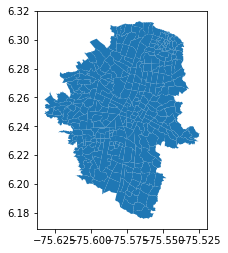

In [11]:
# select urban SIT_zones

SIT_urb = SIT_zones[SIT_zones['desc2']=='Medellin urbano']
SIT_urb.plot()

In [12]:
# check records (rows)
SIT_urb['Name'].unique()

array(['1', '10', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '11', '110', '111', '112', '113', '114', '115',
       '116', '117', '118', '119', '12', '120', '121', '122', '123',
       '124', '125', '126', '127', '128', '129', '13', '130', '131',
       '132', '133', '134', '135', '136', '137', '138', '139', '14',
       '140', '141', '142', '143', '144', '145', '146', '147', '148',
       '149', '15', '150', '151', '152', '153', '154', '155', '156',
       '157', '158', '159', '16', '160', '161', '162', '163', '164',
       '165', '166', '167', '168', '169', '17', '170', '171', '172',
       '173', '174', '175', '176', '177', '178', '179', '18', '180',
       '181', '182', '183', '184', '185', '186', '187', '188', '189',
       '19', '190', '191', '192', '193', '194', '195', '196', '197',
       '198', '199', '2', '20', '200', '201', '202', '203', '204', '205',
       '206', '207', '208', '209', '21', '210', '211', '212', '213',
       '214', '215', '

In [13]:
# check lenght of SIT_urb
len(SIT_urb)

322

In [14]:
# check records (rows) in trip_counts
OD_trips_df['SIT_EOD2017'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 

In [15]:
# force SIT_EOD2017 to be string
OD_trips_df['SIT_EOD2017'] = OD_trips_df['SIT_EOD2017'].apply(str)
OD_trips_df['SIT_EOD2017'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [16]:
# join trip_counts to SIT_urb

SIT_urb_join = pd.merge(SIT_urb, OD_trips_df, 
                   left_on='Name', 
                   right_on='SIT_EOD2017',
                   how = 'left')
SIT_urb_join.head()

,Name,desc2,area_ha,geometry,SIT_EOD2017,1,2,3,4,5,...,802,803,804,805,806,807,810,811,812,Grand Total
0,1,Medellin urbano,26.452,POLYGON Z ((-75.54068356773411 6.3024448096601...,1,364.023018,0.0,0.000000,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1892.919693
1,10,Medellin urbano,6.738,POLYGON Z ((-75.5414934364377 6.29277081622273...,10,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1528.896675
2,100,Medellin urbano,41.420,POLYGON Z ((-75.5719869666916 6.31100734501016...,100,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,8234.252580
3,101,Medellin urbano,39.840,POLYGON Z ((-75.5745398852947 6.30381632076182...,101,0.000000,0.0,85.773464,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,8405.799509
4,102,Medellin urbano,28.680,POLYGON Z ((-75.5805618474142 6.29757524471215...,102,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,5575.275184


In [17]:
# check length after join
len(SIT_urb_join)

322

In [18]:
# drop last column 'Grand Total'
SIT_urb_join.drop('Grand Total', inplace=True, axis=1)
SIT_urb_join.head()

,Name,desc2,area_ha,geometry,SIT_EOD2017,1,2,3,4,5,...,801,802,803,804,805,806,807,810,811,812
0,1,Medellin urbano,26.452,POLYGON Z ((-75.54068356773411 6.3024448096601...,1,364.023018,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,Medellin urbano,6.738,POLYGON Z ((-75.5414934364377 6.29277081622273...,10,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,Medellin urbano,41.420,POLYGON Z ((-75.5719869666916 6.31100734501016...,100,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,101,Medellin urbano,39.840,POLYGON Z ((-75.5745398852947 6.30381632076182...,101,0.000000,0.0,85.773464,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,102,Medellin urbano,28.680,POLYGON Z ((-75.5805618474142 6.29757524471215...,102,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Verify type of data of numeric columns

column_names = list(SIT_urb_join)
for column in column_names: 
    print(column, " :", SIT_urb_join[column].dtype) 

Name  : object
desc2  : object
area_ha  : float64
geometry  : object
SIT_EOD2017  : object
1  : float64
2  : float64
3  : float64
4  : float64
5  : float64
6  : float64
7  : float64
8  : float64
9  : float64
10  : float64
11  : float64
12  : float64
13  : float64
14  : float64
15  : float64
16  : float64
17  : float64
18  : float64
19  : float64
20  : float64
21  : float64
22  : float64
23  : float64
24  : float64
25  : float64
26  : float64
27  : float64
28  : float64
29  : float64
30  : float64
31  : float64
32  : float64
33  : float64
34  : float64
35  : float64
36  : float64
37  : float64
38  : float64
39  : float64
40  : float64
41  : float64
42  : float64
43  : float64
44  : float64
45  : float64
46  : float64
47  : float64
48  : float64
49  : float64
50  : float64
51  : float64
52  : float64
53  : float64
54  : float64
55  : float64
56  : float64
57  : float64
58  : float64
59  : float64
60  : float64
61  : float64
62  : float64
63  : float64
64  : float64
65  : float64
66  : fl

All columns type numeric - OK!

In [20]:
SIT_urb_join.head()

,Name,desc2,area_ha,geometry,SIT_EOD2017,1,2,3,4,5,...,801,802,803,804,805,806,807,810,811,812
0,1,Medellin urbano,26.452,POLYGON Z ((-75.54068356773411 6.3024448096601...,1,364.023018,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,Medellin urbano,6.738,POLYGON Z ((-75.5414934364377 6.29277081622273...,10,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,Medellin urbano,41.420,POLYGON Z ((-75.5719869666916 6.31100734501016...,100,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,101,Medellin urbano,39.840,POLYGON Z ((-75.5745398852947 6.30381632076182...,101,0.000000,0.0,85.773464,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,102,Medellin urbano,28.680,POLYGON Z ((-75.5805618474142 6.29757524471215...,102,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# read first row from columns 1 to last

threshold_percentage = 0.05 # <-- change this values for other thresholds!!!
boolean_vector = None

for i in range(len(SIT_urb_join)):
    ith_row = SIT_urb_join.iloc[i][5:] # is the column after 'SIT_O'
    ith_row_total = sum(ith_row.values)
    ith_boolean_row = ith_row > (ith_row_total*threshold_percentage)
    
    if i == 0:
        boolean_vector = ith_boolean_row
    else:
        boolean_vector = np.logical_or(boolean_vector, ith_boolean_row)
    
boolean_vector

1       True
2      False
3       True
4      False
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12     False
13      True
14      True
15      True
16      True
17      True
18     False
19      True
20      True
21      True
22      True
23     False
24      True
25      True
26     False
27     False
28      True
29      True
30      True
       ...  
631    False
632    False
633    False
634    False
635    False
636    False
637    False
638     True
639     True
640     True
641    False
642    False
643    False
644     True
645     True
648    False
649    False
650    False
651     True
800    False
801     True
802     True
803     True
804    False
805    False
806    False
807    False
810    False
811    False
812    False
Name: 0, Length: 544, dtype: bool

In [22]:
# keep only "True" records

boolean_vector = boolean_vector[boolean_vector == True]
boolean_vector

1      True
3      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
13     True
14     True
15     True
16     True
17     True
19     True
20     True
21     True
22     True
24     True
25     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
       ... 
436    True
439    True
446    True
452    True
456    True
457    True
459    True
461    True
465    True
468    True
469    True
472    True
475    True
476    True
479    True
481    True
601    True
602    True
622    True
624    True
625    True
638    True
639    True
640    True
644    True
645    True
651    True
801    True
802    True
803    True
Name: 0, Length: 355, dtype: bool

In [23]:
# add urban polygons to the selection

# convert IDs of urban zones to list ('Name')
SIT_urb_list = SIT_urb['Name'].tolist()
SIT_urb_array = np.array(SIT_urb_list)
SIT_urb_array = SIT_urb_array.astype(int)
SIT_urb_list = SIT_urb_array.tolist()
#SIT_urb_list

# boolean_vector to list
boolean_vector_list = boolean_vector.index.tolist()
boolean_vector_array = np.array(boolean_vector_list)
boolean_vector_array = boolean_vector_array.astype(float)
boolean_vector_array = boolean_vector_array.astype(int)
boolean_vector_list = boolean_vector_array.tolist()

list_with_non_unique_ids = SIT_urb_list + boolean_vector_list
list_with_non_unique_ids_arr = np.array(list_with_non_unique_ids)
list_with_non_unique_ids_arr = np.unique(list_with_non_unique_ids_arr)
list_with_non_unique_ids_arr = list_with_non_unique_ids_arr.astype(str)
list_with_non_unique_ids_arr

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

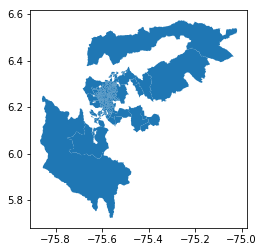

In [24]:
# Select geographies based on list SIT_names_df['Name']

SIT_aoi = SIT_zones[SIT_zones.Name.isin(list_with_non_unique_ids_arr)]
SIT_aoi.plot()

In [129]:
# save to disk
# SIT_aoi.to_file('../EOD_2017/ZonasSIT_sel.shp')